## Linear Regression

Linear regression is a method for modeling the relationship between one or more independent variables and a dependent variable. It is a staple of statistics and is often considered a good introductory machine learning method. It is also a method that can be reformulated using matrix notation and solved using matrix operations.

y = f(x)

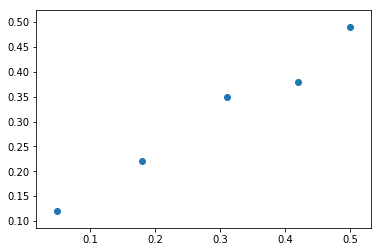

A scatter plot of the dataset is then created showing that a straight line cannot fit this data exactly


In [6]:
# Linear regression dataset
from numpy import array
from matplotlib import pyplot
%matplotlib inline

data = array([
    [0.05, 0.12],
    [0.18, 0.22],
    [0.31, 0.35],
    [0.42, 0.38],
    [0.50, 0.49]
])

# split into inputs and outputs
X, y = data[:, 0], data[:, 1]
X = X.reshape((len(X), 1))
# scatter plot
pyplot.scatter(X, y)
pyplot.show()
print('A scatter plot of the dataset is then created showing that a straight line cannot fit this data exactly')

### Solve via Inverse
A problem with this approach is the matrix inverse that is both computationally expensive and numerically unstable. An alternative approach is to use a matrix decomposition to avoid this operation

[1.00233226]


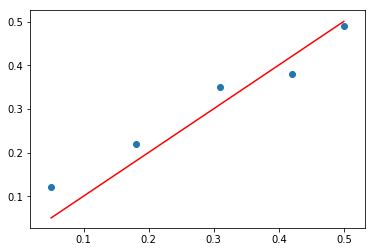

In [7]:
# direct solution to linear least squares
from numpy import array
from numpy.linalg import inv
from matplotlib import pyplot
%matplotlib inline

data = array([
    [0.05, 0.12],
    [0.18, 0.22],
    [0.31, 0.35],
    [0.42, 0.38],
    [0.50, 0.49]
])

# split into inputs and outputs
X, y = data[:, 0], data[:, 1]
X = X.reshape((len(X), 1))
# linear least squares 
b = inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

### Solve via QR Decomposition
The QR decomposition is an approach of breaking a matrix down into its constituent elements. The QR decomposition is a popular approach for solving the linear least squares equation.

A = Q.R

The QR decomposition approach is more computationally effcient and more numerically stable than calculating the normal equation directly, but does not work for all data matrices.

[1.00233226]


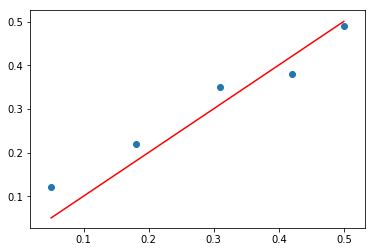

In [10]:
# QR decomposition solution to linear least squares
from numpy import array
from numpy.linalg import inv
from numpy.linalg import qr
from matplotlib import pyplot
%matplotlib inline

data = array([
    [0.05, 0.12],
    [0.18, 0.22],
    [0.31, 0.35],
    [0.42, 0.38],
    [0.50, 0.49]
])

# split into inputs and outputs
X, y = data[:, 0], data[:, 1]
X = X.reshape((len(X), 1))
# factorize
Q, R = qr(X)
b = inv(R).dot(Q.T).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X,y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

### Solve via SVD and Pseudoinverse
Unlike the QR decomposition, all matrices have a singular-value decomposition. As a basis for solving the system of linear equations for linear regression, SVD is more stable and the preferred approach.

[1.00233226]


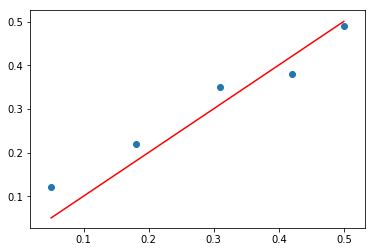

In [14]:
# SVD solution via pseudoinverse to linear least squares
from numpy import array
from numpy.linalg import pinv
from matplotlib import pyplot
%matplotlib inline

data = array([
    [0.05, 0.12],
    [0.18, 0.22],
    [0.31, 0.35],
    [0.42, 0.38],
    [0.50, 0.49]
])

# split into inputs and outputs
X, y = data[:, 0], data[:, 1]
X = X.reshape((len(X), 1))
# calculate coefficients
b = pinv(X).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

### Solve via Convenience function
The pseudoinverse via SVD approach to solving linear least squares is the de facto standard. This is because it is stable and works with most datasets. NumPy provides a convenience function named __lstsq()__ that solves the linear least squares function using the SVD approach.

[1.00233226]


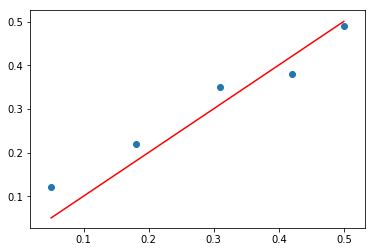

In [13]:
# least squares via convenience function
from numpy import array
from numpy.linalg import lstsq
from matplotlib import pyplot
%matplotlib inline

data = array([
    [0.05, 0.12],
    [0.18, 0.22],
    [0.31, 0.35],
    [0.42, 0.38],
    [0.50, 0.49]
])

# split into inputs and outputs
X, y = data[:, 0], data[:, 1]
X = X.reshape((len(X), 1))
# calculate coefficients
b, residuals, rank, s = lstsq(X, y, rcond=-1)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()